# Spam Detection Using Naive Bayes Classifier on Spambase Dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url,header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


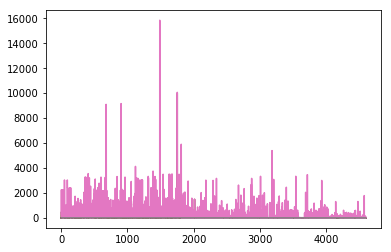

In [6]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.show()

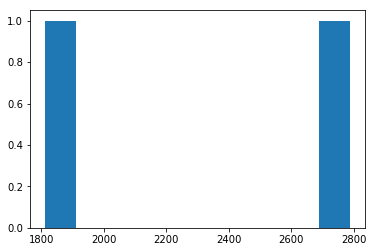

In [7]:
spam = data[data[57]==1]
not_spam = data[data[57]==0]

plt.hist([len(spam) , len(not_spam)])
plt.show()

In [16]:
train, test = train_test_split(data, test_size=0.30)

train_X = train.loc[:,:56]
train_Y = train.loc[:,57]

test_X = test.loc[:,:56]
test_Y = test.loc[:,57]

classifier = MultinomialNB()
classifier.fit(train_X, train_Y)
preds = pd.DataFrame(classifier.predict(test_X))

In [17]:
plt.scatter(test_Y,preds)

print (test_Y.describe())
print (preds.describe())


count    1381.000000
mean        0.374366
std         0.484134
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 57, dtype: float64
                 0
count  1381.000000
mean      0.375815
std       0.484508
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


In [18]:
acc = classifier.score(test_X,test_Y)

print ("Accuracy of the NaiveBayes Model: ",round(acc*100,2), "%")

Accuracy of the NaiveBayes Model:  83.06 %
